In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('ImproveAndRepeatStatsNov23Okt24.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      366 non-null    object
 1   Jetpack                   366 non-null    int64 
 2   Statify                   366 non-null    int64 
 3   WP Statistics             366 non-null    int64 
 4   Jetpack (Visitors)        366 non-null    int64 
 5   WP Statistics (Visitors)  366 non-null    int64 
 6   Year                      366 non-null    int64 
 7   Week                      366 non-null    int64 
 8   YearWeek                  366 non-null    object
 9   Month                     366 non-null    int64 
 10  YearMonth                 366 non-null    object
dtypes: int64(8), object(3)
memory usage: 31.6+ KB


In [3]:
df

,Date,Jetpack,Statify,WP Statistics,Jetpack (Visitors),WP Statistics (Visitors),Year,Week,YearWeek,Month,YearMonth
0,2023-11-01,589,802,705,480,504,2023,44,2023_44,11,2023_11
1,2023-11-02,618,858,744,541,586,2023,44,2023_44,11,2023_11
2,2023-11-03,573,772,667,481,493,2023,44,2023_44,11,2023_11
3,2023-11-04,195,280,239,170,188,2023,44,2023_44,11,2023_11
4,2023-11-05,184,279,226,163,170,2023,45,2023_45,11,2023_11
...,...,...,...,...,...,...,...,...,...,...,...
361,2024-10-27,119,178,174,76,122,2024,44,2024_44,10,2024_10
362,2024-10-28,339,462,460,284,377,2024,44,2024_44,10,2024_10
363,2024-10-29,347,499,493,274,390,2024,44,2024_44,10,2024_10
364,2024-10-30,362,480,476,309,411,2024,44,2024_44,10,2024_10


## Page Views for 12 months

In [4]:
total = df[['Jetpack', 'WP Statistics', 'Statify']].sum()

[Text(0.5, 0, 'Page Views')]

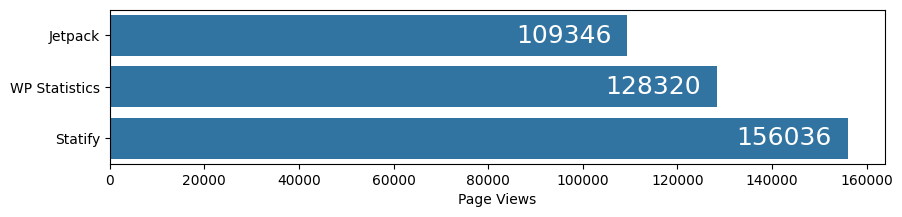

In [5]:
plt.figure(figsize=(10,2))
ax = sns.barplot(data=total,label="Total",  orient='h')
for i in ax.containers:
    ax.bar_label(i, label_type="edge", padding=-80, color="white", fontsize=18)
ax.set(xlabel="Page Views")

In [6]:
ax.figure.savefig('./statstool_year.png',
            dpi=200, bbox_inches="tight") 

## Page Views per month

In [7]:
df2 = df.groupby('YearMonth').sum()
monthly = df2[['Jetpack', 'WP Statistics', 'Statify']]
monthly

,Jetpack,WP Statistics,Statify
YearMonth,,,
2023_11,15141,18127,21025
2023_12,10985,13230,15389
2024_01,11515,13729,16159
2024_02,10573,13926,15304
2024_03,9372,11821,13502
2024_04,8588,10895,12471
2024_05,6575,8146,9699
2024_06,6061,6711,8877
2024_07,6290,4287,9178


In [8]:
monthly = monthly.reset_index()
monthly_melted = monthly.melt(id_vars="YearMonth",
        var_name="Tool", 
        value_name="Visitors")
monthly_melted.head()

,YearMonth,Tool,Visitors
0,2023_11,Jetpack,15141
1,2023_12,Jetpack,10985
2,2024_01,Jetpack,11515
3,2024_02,Jetpack,10573
4,2024_03,Jetpack,9372


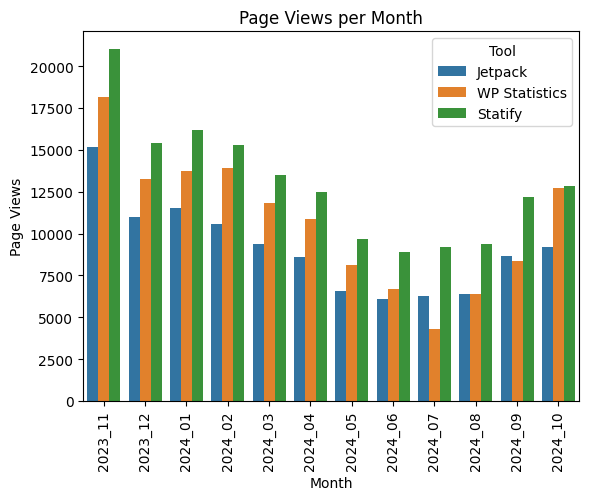

In [9]:
ax = sns.barplot(monthly_melted, x="YearMonth", y="Visitors", hue="Tool",)
ax.set(xlabel ="Month", ylabel = "Page Views", title ='Page Views per Month')
ax.tick_params(axis='x',which='major',rotation=90)

In [10]:
ax.figure.savefig('./statstool_monthly.png',
            dpi=200, bbox_inches="tight") 

## Page Views per Week

In [11]:
df2 = df.groupby('YearWeek').sum()
weekly = df2[['Jetpack', 'WP Statistics', 'Statify']]
#weekly['week'] = weekly.index
weekly = weekly.reset_index()
weekly.head()

,YearWeek,Jetpack,WP Statistics,Statify
0,2023_44,1975,2355,2712
1,2023_45,3438,4120,4829
2,2023_46,3644,4347,4991
3,2023_47,3372,4026,4720
4,2023_48,3379,4120,4783


In [12]:

weekly_melted = weekly.melt( id_vars="YearWeek",
        var_name="Tool", 
        value_name="Visitors")
weekly_melted.head()

,YearWeek,Tool,Visitors
0,2023_44,Jetpack,1975
1,2023_45,Jetpack,3438
2,2023_46,Jetpack,3644
3,2023_47,Jetpack,3372
4,2023_48,Jetpack,3379


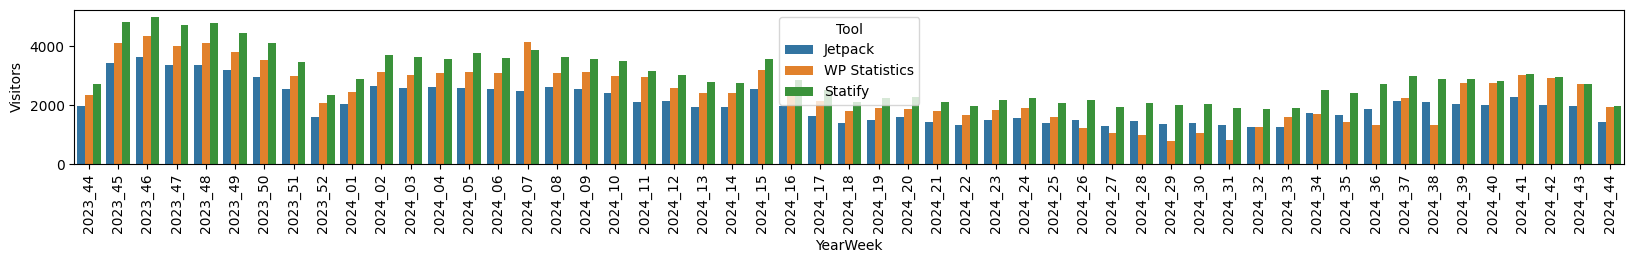

In [13]:
from matplotlib.ticker import ScalarFormatter as SF

plt.figure(figsize=(20,2))
ax = sns.barplot(weekly_melted, x="YearWeek", y="Visitors", hue="Tool")
ax.tick_params(axis='x',which='major',rotation=90)

## Visitors for 12 months

In [14]:
visitors = df[['Jetpack (Visitors)', 'WP Statistics (Visitors)']]
visitors

,Jetpack (Visitors),WP Statistics (Visitors)
0,480,504
1,541,586
2,481,493
3,170,188
4,163,170
...,...,...
361,76,122
362,284,377
363,274,390
364,309,411


In [15]:
visitors = visitors.rename({'Jetpack (Visitors)': 'Jetpack', 'WP Statistics (Visitors)': 'WP Statistics'}, axis=1)
visitors

,Jetpack,WP Statistics
0,480,504
1,541,586
2,481,493
3,170,188
4,163,170
...,...,...
361,76,122
362,284,377
363,274,390
364,309,411


In [16]:
total = df[['Jetpack', 'WP Statistics']].sum()
total

Jetpack          109346
WP Statistics    128320
dtype: int64

[Text(0.5, 0, 'Visitors')]

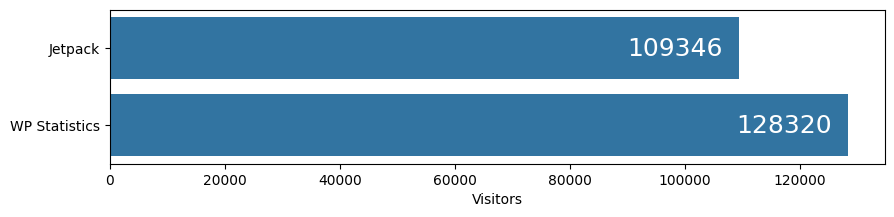

In [17]:
plt.figure(figsize=(10,2))
ax = sns.barplot(data=total,label="Total",  orient='h')
for i in ax.containers:
    ax.bar_label(i, label_type="edge", padding=-80, color="white", fontsize=18)
ax.set(xlabel="Visitors")

In [18]:
ax.figure.savefig('./statstool_visitors_year.png',
            dpi=200, bbox_inches="tight") 

## Visitors per month

In [19]:
df2 = df.groupby('YearMonth').sum()
monthly = df2[['Jetpack (Visitors)', 'WP Statistics (Visitors)']]
monthly = monthly.rename({'Jetpack (Visitors)': 'Jetpack', 'WP Statistics (Visitors)': 'WP Statistics'}, axis=1)
monthly

,Jetpack,WP Statistics
YearMonth,,
2023_11,12833,13346
2023_12,9183,9737
2024_01,9830,10587
2024_02,9099,10655
2024_03,7928,9429
2024_04,6765,8282
2024_05,5603,6804
2024_06,5108,5608
2024_07,5357,3607


In [20]:
monthly = monthly.reset_index()
monthly_melted = monthly.melt(id_vars="YearMonth",
        var_name="Tool", 
        value_name="Visitors")
monthly_melted.head()

,YearMonth,Tool,Visitors
0,2023_11,Jetpack,12833
1,2023_12,Jetpack,9183
2,2024_01,Jetpack,9830
3,2024_02,Jetpack,9099
4,2024_03,Jetpack,7928


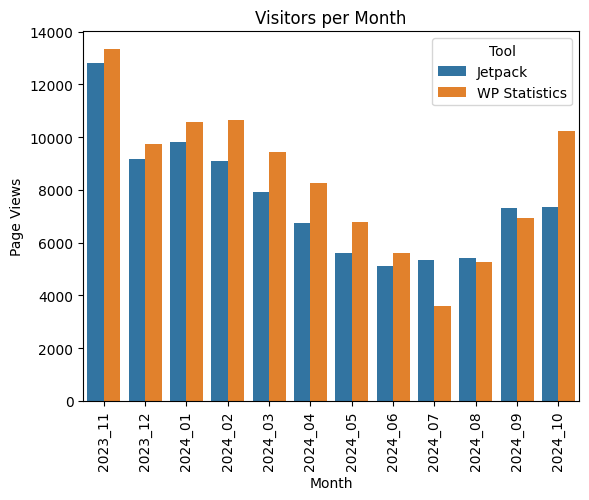

In [21]:
ax = sns.barplot(monthly_melted, x="YearMonth", y="Visitors", hue="Tool",)
ax.set(xlabel ="Month", ylabel = "Page Views", title ='Visitors per Month')
ax.tick_params(axis='x',which='major',rotation=90)

In [22]:
ax.figure.savefig('./statstool_visitors_monthly.png',
            dpi=200, bbox_inches="tight") 